In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge
from scipy import stats
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("export.csv")
df


,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [3]:
list1 = df.iloc[392:823,0].tolist()
list2 = ["C", "O", "c", "F", "N", "Br", "S"]

In [4]:
def atommass(a):
    mass = {"C": 12, "O": 16, "F": 18, "N": 14, "S": 32, "Br": 80, "c": 12}
    for items, value in mass.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def atomno(a):
    num = {"C": 6, "O": 8, "F": 9, "N": 7, "S": 16, "Br": 35, "c": 6}
    for items, value in num.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def valency(a):
    val = {"C": 4, "O": 2, "F": 1, "N": 3, "S": 2, "Br": 1, "c": 4}
    for items, value in val.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def hydrogen(smile):
    if smile[0] == "=" or smile[2] == "=" :
        H = 1
    elif smile[0] == "=" and smile[2] == "=":
        H = 0
    else:
        H = 2
    return H

def endhydrogen(smile):
    if smile[0] == "=":
        H = 2
    else:
        H = 3
    return H

In [5]:
identifier = []
A=[]
Aupdated =[]
for i in range(len(list1)):
    orderno = []
    B = []
    for j in range(3, len(list1[i])):
        if list1[i][j] in list2:
            mass = atommass(list1[i][j])
            num = atomno(list1[i][j])
            val = valency(list1[i][j])
            if j != 3 and j != (len(list1[i])-1):
                smiles = list1[i][j-1] + list1[i][j] + list1[i][j+1]
                H = hydrogen(smiles)
            else:
                if j == 3:
                    smiles = list1[i][j] + list1[i][j+1]
                else:
                    smiles = list1[i][j-1] + list1[i][j]
                H = endhydrogen(smiles)
            idno = hash((mass, num, val, H))
            B.append(idno)
        if list1[i][j] == "=":
            orderno.append(j)

    upB = B
    for iteration in range(2): 
        update = []
        for k in range(len(upB)-1):
            Q = []
            if k == 0:
                if list1[i][4]== "=":
                    g = 2
                else:
                    g = 1 
                Q = [iteration + 1 , upB[k]] + [g, upB[k+1]]
            elif k != len(B) -1:
                
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]] + [1, upB[k+1]]
            else:
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]]  
            update.append(hash(tuple(Q)))
        upB = update
    A.append(B)
    Aupdated.append(upB)

In [6]:
fingerprint=[]
for i in range(len(Aupdated)):         
    fp = np.zeros(1024)
    remainder = []
    for j in range(len(Aupdated[i])):
        remainder.append(Aupdated[i][j] % 1024)
    for x in remainder:
        fp[x] = 1
    fingerprint.append(fp)

In [7]:
dfnew = pd.DataFrame(fingerprint)

In [8]:
y = df.iloc[392:823,:].value
x= dfnew

In [9]:
reg_1=MLPRegressor(max_iter=5000)
reg_1.fit(x,y)
# score=cross_val_score(reg_1,x,y,cv=4)
pred_1 = reg_1.predict(x)
result1 = x

result1['prediction'] = pred_1.tolist()
result1.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.115752
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.038564
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.616668
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.740392
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.740392


In [10]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R2 =r2_score(y, pred_1)

print('R^2 of Atomization energy:', R2)

mse = np.sqrt(mean_squared_error(y, pred_1))
print('RMSE of Atomization energy:', mse)

R^2 of Atomization energy: 0.7038578353971461
RMSE of Atomization energy: 12.933861559116117


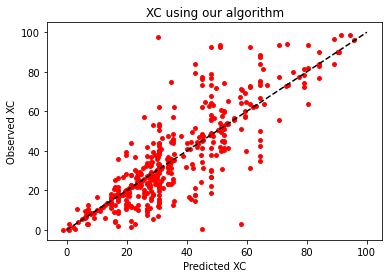

In [11]:
plt.scatter(pred_1,y,c="r",s=15)
plt.plot([0,100],[0,100],"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("XC using our algorithm");

In [12]:
reg= MLPRegressor()

param_grid = {
    'hidden_layer_sizes': [(30), (60,)],
    'max_iter': [50, 200],

}

In [13]:
grid = GridSearchCV(reg, param_grid, n_jobs= -1, cv=5)
grid.fit(x,y)

print(grid.best_params_)

{'hidden_layer_sizes': 30, 'max_iter': 200}


In [14]:
reg2 = MLPRegressor(hidden_layer_sizes= (30), max_iter= 200)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.3)
  
reg2.fit(X_train1, y_train1) 


predictions2 = reg2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Atomization energy:', Rmse)

MSE of Atomization energy: 12.9146392566138


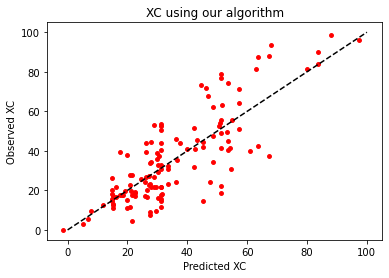

In [15]:
plt.scatter(predictions2,y_test1,c="r",s=15)
plt.plot([0,100],[0,100],"k--")
plt.xlabel('Predicted XC')
plt.ylabel('Observed XC')
plt.title("XC using our algorithm");